### Initialize colab session and install pyspark which will be used in this study

In [101]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *
#Create spark instance
spark = SparkSession.builder.appName('Big data analytics').getOrCreate()

###  Import data

In [2]:
df_2019 = spark.read.csv('data/Road Safety Data - Accidents 2019.csv', header = True)

In [3]:
df_2015 = spark.read.csv('data/Accidents_2015.csv', header = True)

In [4]:
df_2015

DataFrame[Accident_Index: string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, Latitude: string, Police_Force: string, Accident_Severity: string, Number_of_Vehicles: string, Number_of_Casualties: string, Date: string, Day_of_Week: string, Time: string, Local_Authority_(District): string, Local_Authority_(Highway): string, 1st_Road_Class: string, 1st_Road_Number: string, Road_Type: string, Speed_limit: string, Junction_Detail: string, Junction_Control: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Light_Conditions: string, Weather_Conditions: string, Road_Surface_Conditions: string, Special_Conditions_at_Site: string, Carriageway_Hazards: string, Urban_or_Rural_Area: string, Did_Police_Officer_Attend_Scene_of_Accident: string, LSOA_of_Accident_Location: string]

In [5]:
df_2010 = spark.read.csv('data/DfTRoadSafety_Accidents_2010.csv', header = True)

#### Overview of data

In [6]:
df_2010.printSchema

<bound method DataFrame.printSchema of DataFrame[Accident_Index: string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, Latitude: string, Police_Force: string, Accident_Severity: string, Number_of_Vehicles: string, Number_of_Casualties: string, Date: string, Day_of_Week: string, Time: string, Local_Authority_(District): string, Local_Authority_(Highway): string, 1st_Road_Class: string, 1st_Road_Number: string, Road_Type: string, Speed_limit: string, Junction_Detail: string, Junction_Control: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Light_Conditions: string, Weather_Conditions: string, Road_Surface_Conditions: string, Special_Conditions_at_Site: string, Carriageway_Hazards: string, Urban_or_Rural_Area: string, Did_Police_Officer_Attend_Scene_of_Accident: string, LSOA_of_Accident_Location: string]>

### Merging the data

In [7]:
#Merge years 2019 and 2015
df1 = df_2019.union(df_2015)
#Merge years 2019, 2015, and 2010
df = df1.union(df_2010)

In [8]:
df.show(10)

+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude| Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|Road_Type|Speed_limit|Junction_Detail|Junction_Control|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_

In [9]:
df.describe().show()

+-------+--------------+---------------------+----------------------+------------------+------------------+------------------+------------------+------------------+--------------------+----------+------------------+------+--------------------------+-------------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------------------------------+---------------------------------------+------------------+------------------+-----------------------+--------------------------+--------------------+-------------------+-------------------------------------------+-------------------------+
|summary|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|         Longitude|          Latitude|      Police_Force| Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|       Day_of_Week|  Time|Local_Authority_(District)|Local_Authority_(Highway)|   1st_Road_Class|   1st

#### Count the number of missing observations

- This includes counting the number of missing observations per attribute

In [10]:
from pyspark.sql.functions import col,sum
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+--------------+---------------------+----------------------+---------+--------+------------+-----------------+------------------+--------------------+----+-----------+----+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude|Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|Date|Day_of_Week|Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|Road_Type|Speed_limit|Junction_Detail|Junction_Control|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Control|Pedestri

In [11]:
print("Attributes contained in the data\n\n")
df.columns

Attributes contained in the data




['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location']

In [12]:
### Convert to pandas dataframe for visualization
df1 = df.toPandas()

In [13]:
df1.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218,180407,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219,172463,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222,182543,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531,184605,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920,184004,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [14]:
df1['Accident_Severity'].unique()

array(['3', '2', '1'], dtype=object)

### Drop missing observations

In [15]:
df1 = df1.dropna()

In [16]:
#!pip install plotly
import plotly.graph_objects as go
import plotly.express as px
#!pip install seaborn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [17]:
df1['Accident_Severity'].unique()

array(['3', '2', '1'], dtype=object)

### Drop missing observations

In [18]:
df1 = df1.dropna()

In [19]:
#!pip install plotly
import plotly.graph_objects as go
import plotly.express as px
#!pip install seaborn
import seaborn as sns

In [20]:
df1['Accident_Severity'].unique()

array(['3', '2', '1'], dtype=object)

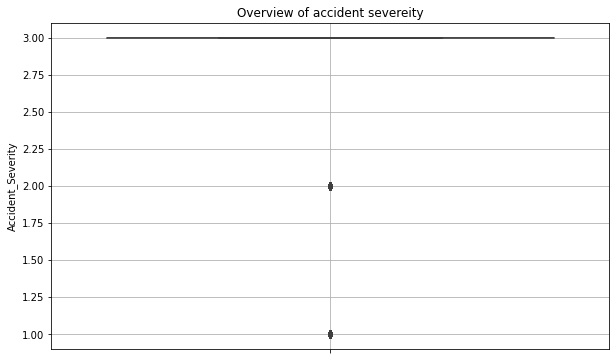

In [21]:

plt.figure(figsize = (10,6))
warnings.filterwarnings('ignore')
df1['Police_Force'] = df1.Police_Force.astype('int')
df1['Accident_Severity'] = df1.Accident_Severity.astype('int')	
ax = sns.boxplot(y=df1["Accident_Severity"])
plt.title('Overview of accident severeity')
plt.grid('show')
plt.show();

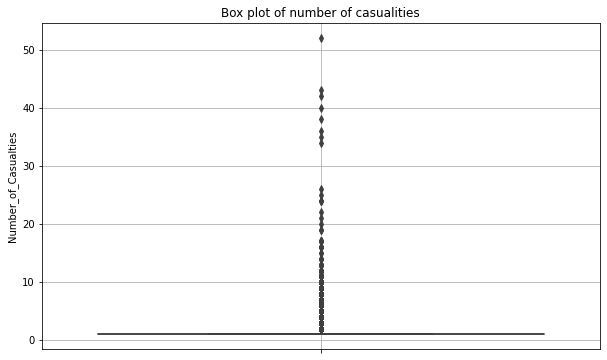

In [22]:

plt.figure(figsize = (10,6))
df1['Number_of_Casualties'] = df1.Number_of_Casualties.astype('float')
ax = sns.boxplot(y=df1["Number_of_Casualties"])
plt.title('Box plot of number of casualities')
plt.grid('show')
plt.show();

#### After cleaning

In [23]:
df1['Accident_Severity'].unique()

array([3, 2, 1])

In [24]:
df.columns

['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location']

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387011 entries, 0 to 411988
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               387011 non-null  object 
 1   Location_Easting_OSGR                        387011 non-null  object 
 2   Location_Northing_OSGR                       387011 non-null  object 
 3   Longitude                                    387011 non-null  object 
 4   Latitude                                     387011 non-null  object 
 5   Police_Force                                 387011 non-null  int32  
 6   Accident_Severity                            387011 non-null  int32  
 7   Number_of_Vehicles                           387011 non-null  object 
 8   Number_of_Casualties                         387011 non-null  float64
 9   Date                                         387011 non-nul

In [26]:
df1.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218,180407,-0.153842,51.508057,1,3,2,3.0,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219,172463,-0.127949,51.436208,1,3,2,1.0,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222,182543,-0.124193,51.526795,1,3,2,1.0,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531,184605,-0.191044,51.546387,1,2,1,1.0,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920,184004,-0.200064,51.541121,1,3,2,2.0,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


### Import data

### 3.1 Data Preparation 



In [27]:
import pandas as pd
#IMport using pandas to allow us determine the data types
hg = pd.read_csv('data/Road Safety Data - Accidents 2019.csv')
hg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [232]:
df.columns

['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location']

In [28]:
## Select numericla attributes
import numpy as np
print('Numerical attributes')
colss = hg.select_dtypes(include=np.number).columns.tolist()
colss

Numerical attributes


['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident']

In [29]:
#Convert to numeric
nums = df1[colss].apply(pd.to_numeric)
#Copy
sp_df = nums.copy()
#Check data types
nums[nums.select_dtypes(include = ['int64', 'float64']).columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387011 entries, 0 to 411988
Data columns (total 25 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        387011 non-null  int64  
 1   Location_Northing_OSGR                       387011 non-null  int64  
 2   Longitude                                    387011 non-null  float64
 3   Latitude                                     387011 non-null  float64
 4   Number_of_Vehicles                           387011 non-null  int64  
 5   Number_of_Casualties                         387011 non-null  float64
 6   Day_of_Week                                  387011 non-null  int64  
 7   Local_Authority_(District)                   387011 non-null  int64  
 8   1st_Road_Class                               387011 non-null  int64  
 9   1st_Road_Number                              387011 non-nul

In [30]:
#Merge the remaining coluns to the dataset#Compy data
dff = nums[nums.select_dtypes(include = ['int64', 'float64']).columns]
dff[hg.select_dtypes(include = ['object']).columns] = hg.select_dtypes(include = ['object']).columns

In [31]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387011 entries, 0 to 411988
Data columns (total 30 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        387011 non-null  int64  
 1   Location_Northing_OSGR                       387011 non-null  int64  
 2   Longitude                                    387011 non-null  float64
 3   Latitude                                     387011 non-null  float64
 4   Number_of_Vehicles                           387011 non-null  int64  
 5   Number_of_Casualties                         387011 non-null  float64
 6   Day_of_Week                                  387011 non-null  int64  
 7   Local_Authority_(District)                   387011 non-null  int64  
 8   1st_Road_Class                               387011 non-null  int64  
 9   1st_Road_Number                              387011 non-nul

>Using the selected features transform the datatypes

In [32]:
list(set(df.columns) - set(dff.columns))

['Accident_Severity', 'Police_Force']

In [33]:
dff[['Accident_Severity', 'Police_Force']] = df1[['Accident_Severity', 'Police_Force']]

In [34]:
dff = dff.dropna()
dff = dff.reset_index(drop=True)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387011 entries, 0 to 387010
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        387011 non-null  int64  
 1   Location_Northing_OSGR                       387011 non-null  int64  
 2   Longitude                                    387011 non-null  float64
 3   Latitude                                     387011 non-null  float64
 4   Number_of_Vehicles                           387011 non-null  int64  
 5   Number_of_Casualties                         387011 non-null  float64
 6   Day_of_Week                                  387011 non-null  int64  
 7   Local_Authority_(District)                   387011 non-null  int64  
 8   1st_Road_Class                               387011 non-null  int64  
 9   1st_Road_Number                              387011 non-nul

In [35]:
dff.iloc[0:,0:10].columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number'],
      dtype='object')

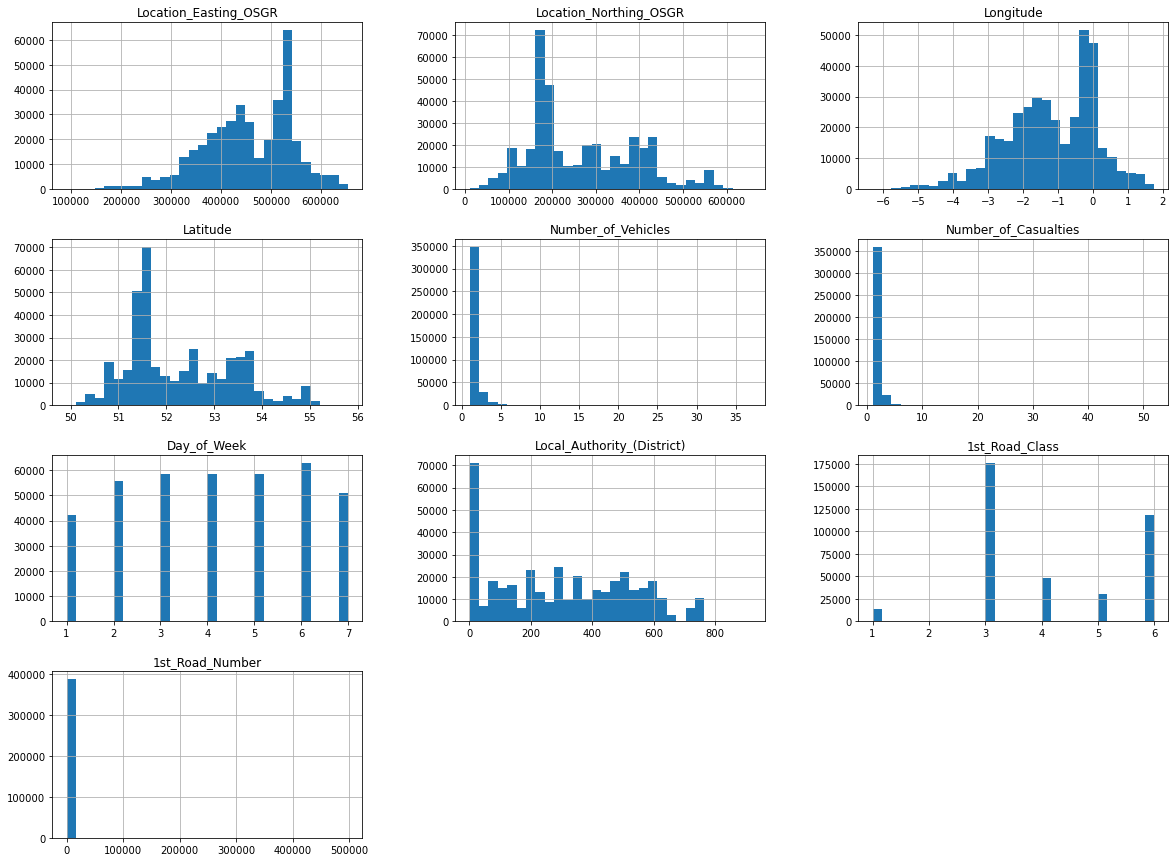

In [36]:
dff.iloc[0:,0:10].hist(bins=30, figsize=(20,15))
plt.show()

In [37]:
dff.iloc[0:,10:20].columns

Index(['Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions'],
      dtype='object')

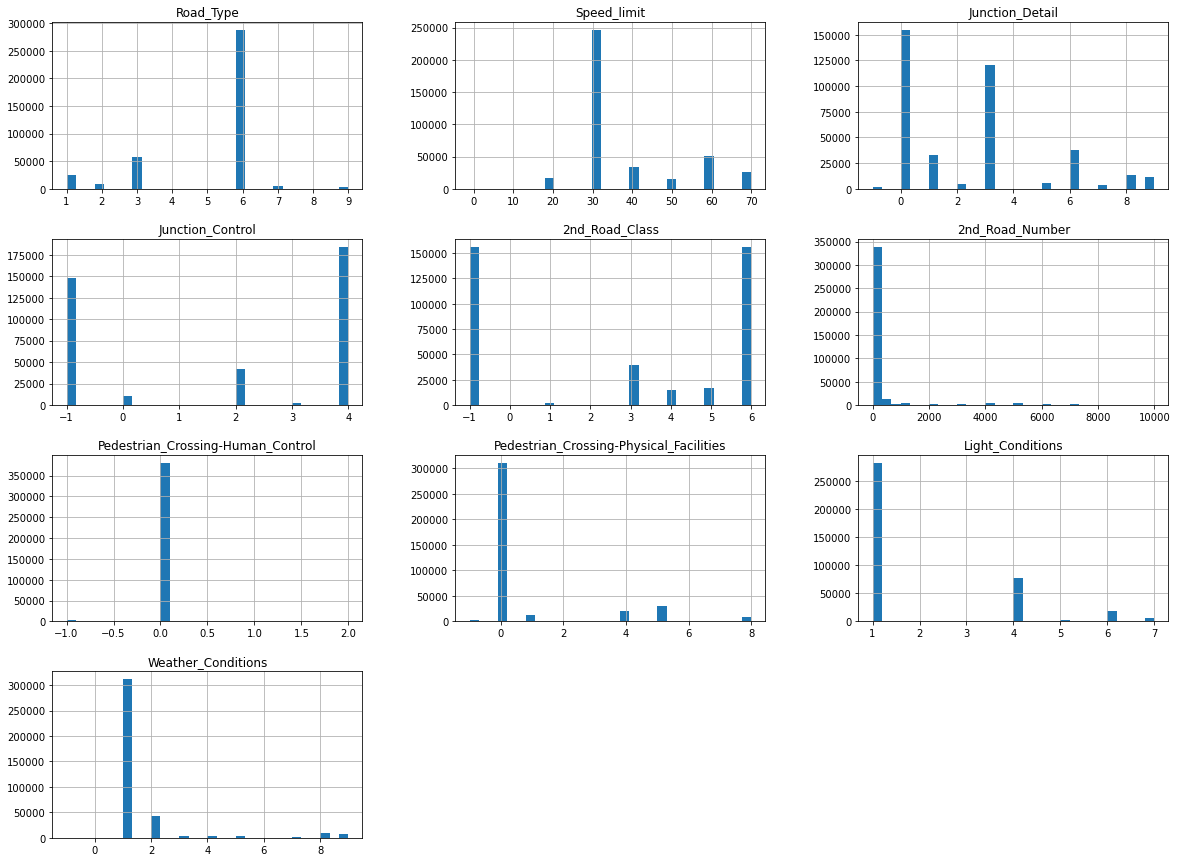

In [38]:
dff.iloc[0:,10:20].hist(bins=30, figsize=(20,15))
plt.show()

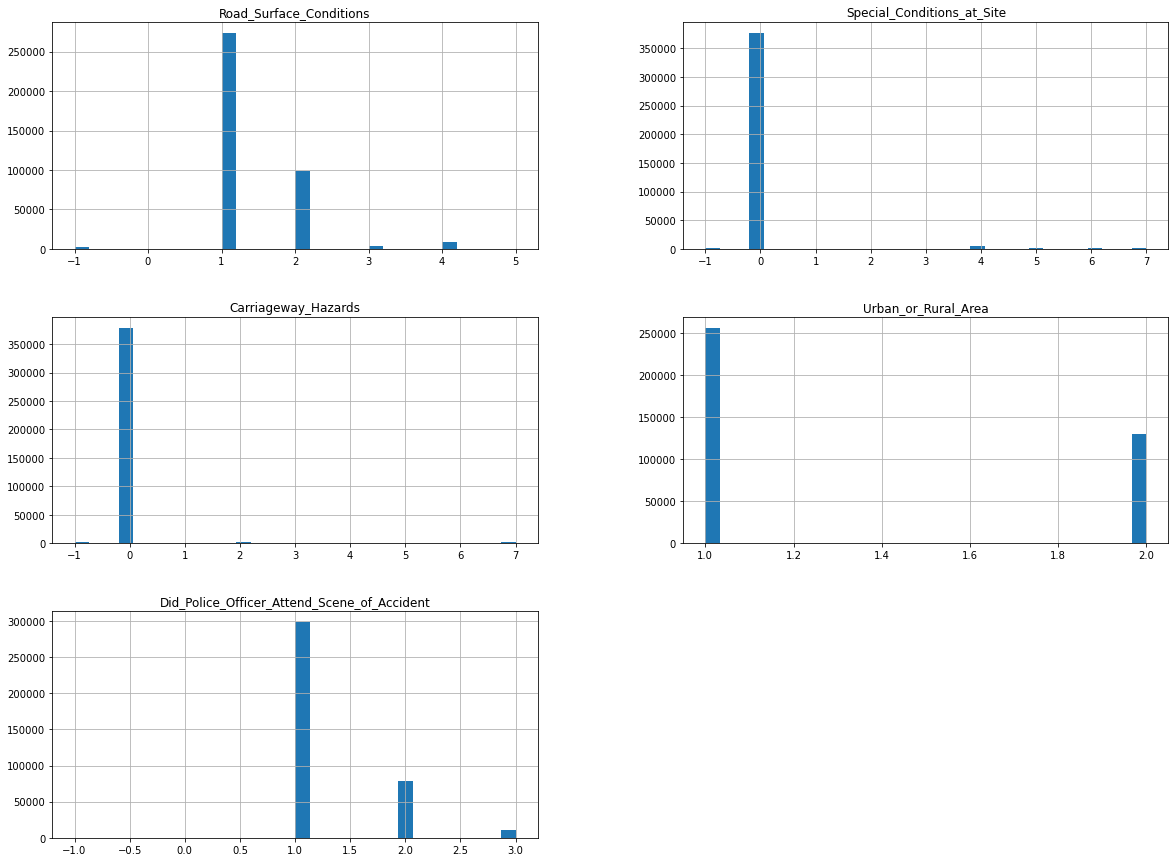

In [39]:
dff.iloc[0:,20:30].hist(bins=30, figsize=(20,15))
plt.show()

### Geographical analysis

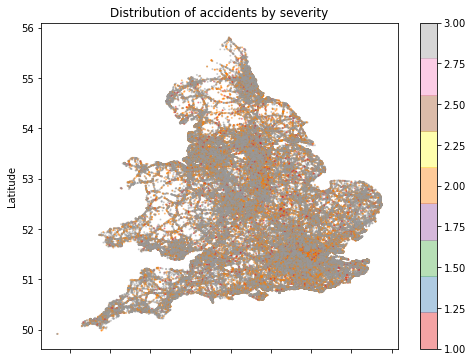

In [41]:
pl = dff.plot(kind="scatter", x="Longitude", y="Latitude", figsize = (8,6), alpha=0.4,s=1,
            c=dff["Accident_Severity"], cmap=plt.get_cmap("Set1"), colorbar=True,
            sharex=True, title = "Distribution of accidents by severity")

In [240]:
dff["Did_Police_Officer_Attend_Scene_of_Accident"] = dff["Did_Police_Officer_Attend_Scene_of_Accident"].replace({-1: 'No', 
                                                                                                                 1: 'Yes',
                                                                                                                 3: 'No',3: 'No'})
dff["Accident_Severity"] = dff["Accident_Severity"].replace({1: 'Fatal', 2: 'Serious', 3:'Slight'})

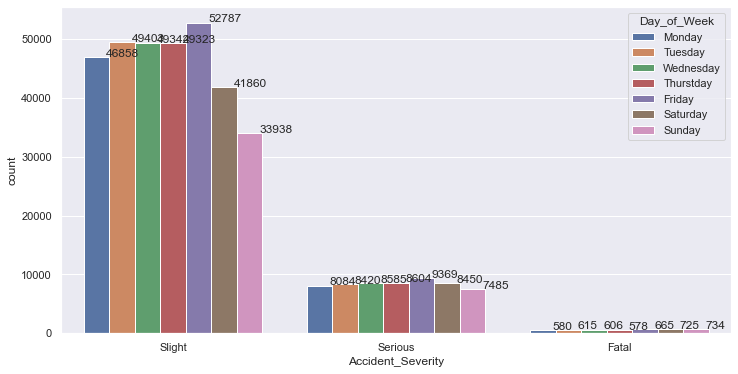

In [241]:
import matplotlib
dff["Day_of_Week"] = dff["Day_of_Week"].replace({1: 'Sunday', 
                                                   2: 'Monday', 
                                                   3: 'Tuesday',
                                                   4: 'Wednesday',
                                                   5: 'Thurstday',
                                                   6: 'Friday',
                                                   7: 'Saturday'})
ordd = ['Slight', 'Serious', 'Fatal']
sns.set(rc={'figure.figsize':(12,6)})
ax=sns.countplot(x='Accident_Severity', hue='Day_of_Week', data=dff, order=ordd)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

In [44]:
dff["Rush_Hour"] = dff["Time"].isin(['07','08','09','15','16','17','18']).astype(int)

In [183]:
df.columns

['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location']

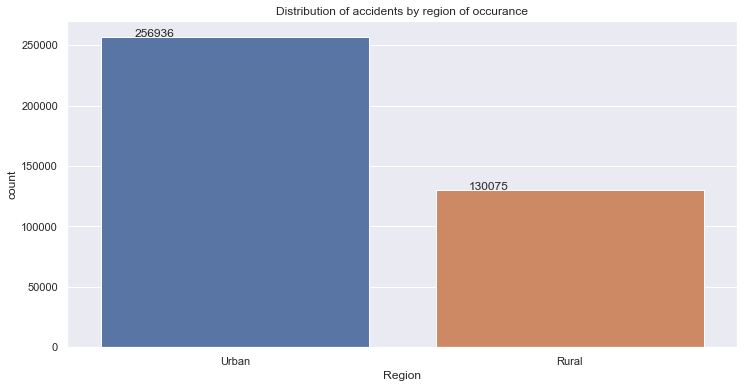

In [238]:
sns.set(rc={'figure.figsize':(12,6)})
dfff = dff.copy()
dfff['Urban_or_Rural_Area'] = dff['Urban_or_Rural_Area'].replace({1: 'Urban', 2: 'Rural'})
ax=sns.countplot(x='Urban_or_Rural_Area', 
                 data=dfff)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.title('Distribution of accidents by region of occurance')
plt.xlabel('Region')
plt.show()

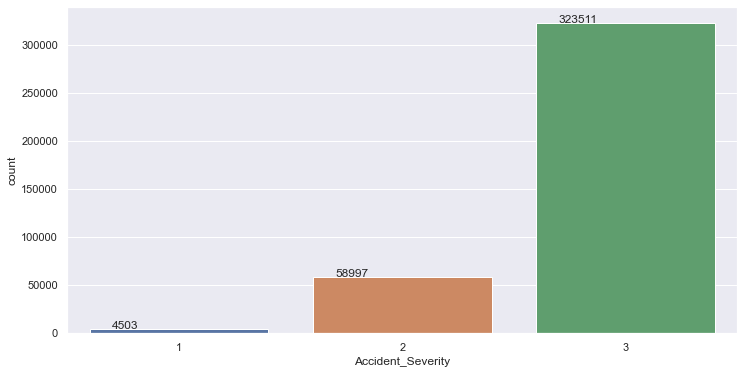

In [237]:
sns.set(rc={'figure.figsize':(12,6)})
ax=sns.countplot(x='Accident_Severity', 
                 data=dff)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

In [46]:
df = df.dropna()
df.columns

['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location']

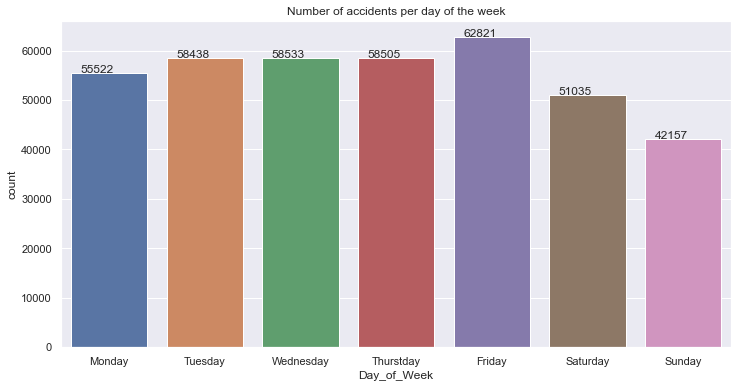

In [236]:
sns.set(rc={'figure.figsize':(12,6)})
ax=sns.countplot(x='Day_of_Week', 
                 data=dff)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.title('Number of accidents per day of the week')
plt.show()

In [216]:
df1['Year'] = [item[6:10] for item in df1.Date]

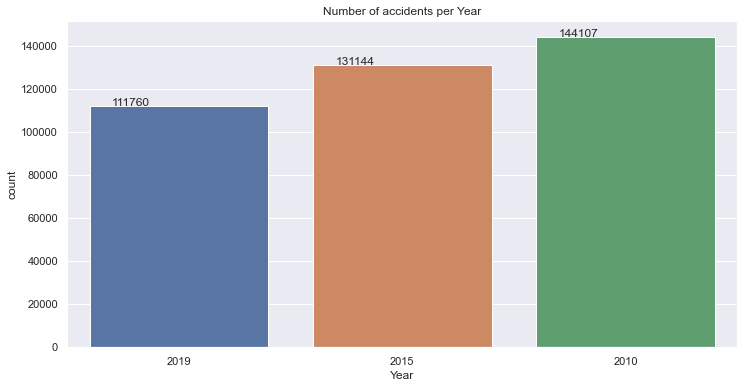

In [235]:
sns.set(rc={'figure.figsize':(12,6)})
ax=sns.countplot(x='Year', 
                 data=df1)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.title('Number of accidents per Year')
plt.show()

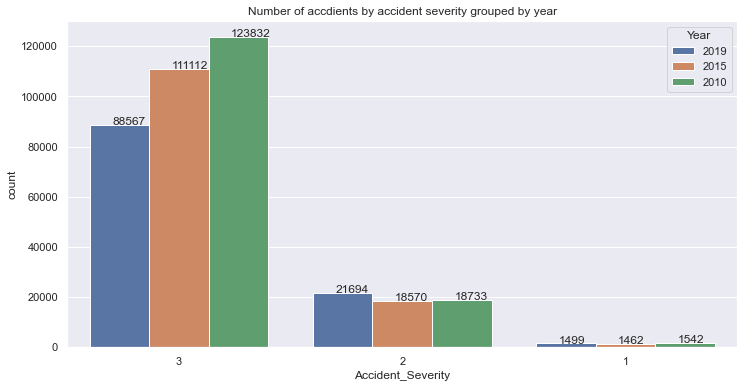

In [234]:
import matplotlib

ordd = [3, 2, 1]
sns.set(rc={'figure.figsize':(12,6)})
ax=sns.countplot(x='Accident_Severity', hue='Year', data=df1, order=ordd)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.title('Number of accdients by accident severity grouped by year')
plt.show()

#### Modelling

In [48]:
dff1 = dff.copy()
dff1 = dff[['1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area']]
schema = StructType([
                     StructField('1st_Road_Class', IntegerType(), True),
                     StructField('1st_Road_Number', IntegerType(), True),
                     StructField('Road_Type', IntegerType(), True),
                     StructField('Speed_limit', IntegerType(), True),
                     StructField('Junction_Detail', IntegerType(), True),
                     StructField('Junction_Control', IntegerType(), True),
                     StructField('2nd_Road_Class', IntegerType(), True),
                     StructField('2nd_Road_Number', IntegerType(), True),
                    StructField('Pedestrian_Crossing-Human_Control', IntegerType(), True),
                     StructField('Pedestrian_Crossing-Physical_Facilities', IntegerType(), True),
                     StructField('Light_Conditions', IntegerType(), True),
                     StructField('Weather_Conditions', IntegerType(), True),
                     StructField('Road_Surface_Conditions', IntegerType(), True),
                     StructField('Special_Conditions_at_Site', IntegerType(), True),
                     StructField('Carriageway_Hazards', IntegerType(), True),
                     StructField('Urban_or_Rural_Area', IntegerType(), True)])

lr_df = spark.createDataFrame(dff[dff.select_dtypes(include = ['int64', 'float64']).columns])

In [55]:
dff["Accident_Severity"] = dff["Accident_Severity"].replace({'Fatal':1, 'Serious':2, 'Slight':3})

In [172]:
clusters = dff[['Longitude', 'Latitude', 'Accident_Severity']]

#### Implement the K-means model

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Scale the Data using Standard Scaler
scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale = scaler.fit(clusters)
df_transformed = std_scale.transform(clusters)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

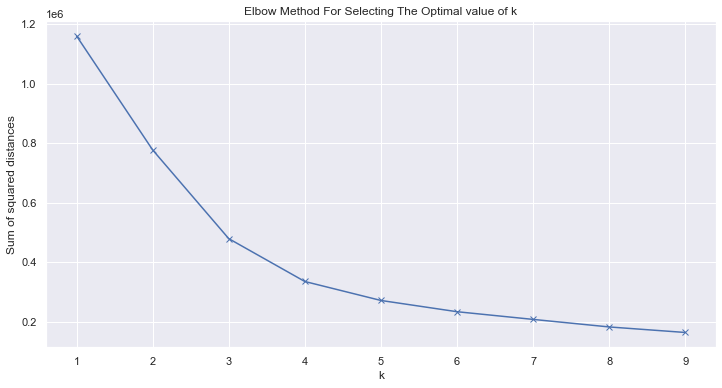

In [233]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Selecting The Optimal value of k')
plt.show()

> Ideally, the optimal value of k would be either 4 or 5. To examine the optimal value, two kmeans models will be implemented and evaluated based on the mutual information score

In [175]:
#Fit kmeans using k = 3
km = KMeans(n_clusters=3)
km = km.fit(df_transformed)
from sklearn.metrics.cluster import adjusted_mutual_info_score
k_3 = adjusted_mutual_info_score(km.labels_, dff.Accident_Severity)

In [176]:
#Fit kmeans using k = 2
km = KMeans(n_clusters=2)
km = km.fit(df_transformed)
from sklearn.metrics.cluster import adjusted_mutual_info_score
k_2 = adjusted_mutual_info_score(km.labels_, dff.Accident_Severity)

In [177]:
#Fit kmeans using k = 3
km = KMeans(n_clusters=4)
km = km.fit(df_transformed)
from sklearn.metrics.cluster import adjusted_mutual_info_score
k_4 = adjusted_mutual_info_score(km.labels_, dff.Accident_Severity)

In [178]:
#Fit kmeans using k = 5
km = KMeans(n_clusters=5)
km = km.fit(df_transformed)
from sklearn.metrics.cluster import adjusted_mutual_info_score
k_5 = adjusted_mutual_info_score(km.labels_, dff.Accident_Severity)

In [179]:
#Fit kmeans using k = 6
km = KMeans(n_clusters=6)
km = km.fit(df_transformed)
from sklearn.metrics.cluster import adjusted_mutual_info_score
k_6 = adjusted_mutual_info_score(km.labels_, dff.Accident_Severity)

In [180]:
#Fit kmeans using k = 6
km = KMeans(n_clusters=7)
km = km.fit(df_transformed)
from sklearn.metrics.cluster import adjusted_mutual_info_score
k_7 = adjusted_mutual_info_score(km.labels_, dff.Accident_Severity)

In [181]:
#Add each mutual information score to dataframe
scoress = [k_2, k_3, k_4, k_5, k_6, k_7]
k_k = [ 2, 3, 4, 5, 6, 7,]
perf = pd.DataFrame()
perf['k'] = k_k
perf['scores'] = scoress
perf.sort_values('scores', ascending = False)

,k,scores
1,3,0.589592
2,4,0.489053
3,5,0.459704
5,7,0.418096
4,6,0.406643
0,2,0.000733


#### Predictiev Modelling

> This will be conducted using both logistic regerssion and random forest models

In [ ]:
clusters = dff[[ 'Longitude',
 'Latitude',
 'Police_Force',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area']]

In [162]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(clusters, 
                                                                            dff.Accident_Severity, test_size = 0.25, random_state = 42)

In [163]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (290258, 22)
Training Labels Shape: (290258,)
Testing Features Shape: (96753, 22)
Testing Labels Shape: (96753,)


In [229]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [230]:
y_pred = rf.predict(test_features)

In [231]:
from sklearn.metrics import classification_report
 
# Your Code to display the classification results as required.
 
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           1       0.07      0.01      0.01      1133
           2       0.23      0.05      0.09     14588
           3       0.84      0.97      0.90     81032

    accuracy                           0.82     96753
   macro avg       0.38      0.34      0.33     96753
weighted avg       0.74      0.82      0.77     96753



### Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
clf = LogisticRegression(random_state=0)
# Train the model on training data
clf.fit(train_features, train_labels);

In [227]:
y_pred = clf.predict(test_features)

In [228]:
# Your Code to display the classification results as required.
 
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1133
           2       0.00      0.00      0.00     14588
           3       0.84      1.00      0.91     81032

    accuracy                           0.84     96753
   macro avg       0.28      0.33      0.30     96753
weighted avg       0.70      0.84      0.76     96753

